In [1]:
from tensorflow import keras
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


model = keras.models.load_model('/content/model.h5')

In [2]:
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t','1','2','3','4','5','6','7']

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 512)              

In [5]:
import cv2
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


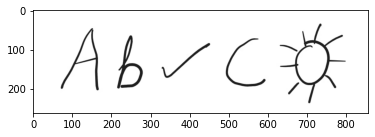

In [7]:
show_img  = cv2.imread('/content/123.jpeg')
plt.imshow(show_img)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
img=cv2.imread('/content/123.jpeg')
imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(imgray,127,255,0)
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

x_a = []
y_a = []
for contour in contours:
    (x,y, w, h) = cv2.boundingRect(contour)
    if cv2.contourArea(contour) < 500:
        continue
    else:
        #cv2.rectangle(img,(x-30,y-30),(x+w+60,y+h+60),(0,255,0), 2)
        new_img=img[y-30:y+h+60,x-30:x+w+30]
        np_img = new_img.flatten()
        #img_new = cv2.resize(new_img,(28,28))
        np_img = new_img.flatten()
        x_a.append(new_img)
        y_a.append(x)


In [10]:
del x_a[0]
del y_a[0]
final = list(zip(x_a,y_a))
print(len(final))
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li
sorted_final = Sort(final)
for i in range(len(x_a)):
  print(sorted_final[i][1])
ls= []
for j in range(len(x_a)-1):
  if sorted_final[j+1][1]-sorted_final[j][1]<=50:
    ls.append(j+1)
l = len(ls)
x = 0    
for i in range(l):
  del sorted_final[ls[i] - x]
  x = x+1
print("\n")
for i in range(len(sorted_final)):
  print(sorted_final[i][1])

7
70
110
214
328
492
630
674


70
214
328
492
630


In [11]:
for i in range(len(sorted_final)):  
  
  img= sorted_final[i][0]
  img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  thresh2 = cv2.threshold(img_grey, 120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1] 
  thresh2 = cv2.erode(thresh2,(40,40))
  old_size = thresh2.shape[:2] # old_size is in (height, width) format
  desired_size = 300
  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])

  # new_size should be in (width, height) format

  im = cv2.resize(thresh2, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0,0]
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)
  blur = cv2.GaussianBlur(new_im,(3,3),0)
  blur[blur>5] = 255
  blur2 = cv2.GaussianBlur(blur,(3,3),0.5)
  img_f = cv2.GaussianBlur(blur2,(3,3),0)
  #nimg = cv2.dilate(nimg,(5,5))
  img_f = cv2.resize(img_f,(28,28))
  img_f[img_f>5] = 255
  img_f = cv2.GaussianBlur(img_f,(3,3),0.5)


  #plt.imshow(img_f,cmap='gray')
  IMG_SIZE=28
  img_final = img_f.reshape(1,IMG_SIZE,IMG_SIZE,1)
  img_final = img_final/150
  print(classes[np.argmax(model.predict(img_final))],end = ' ')


A 3 1 C 7 